In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Guardar los modelos
import joblib

# Agregar la carpeta 'src' al path de búsqueda de Python
sys.path.append(os.path.abspath('../src'))

# Importar funciones desde utils.py
from utils import (
    fit_and_score,
    evaluate_model,
    plot_conf_mat,
    evaluate_cross_validation_metrics,
    plot_cross_validation_metrics
)

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Modelos de Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluar el modelo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Aplicar el theme por defecto
sns.set_theme()

In [2]:
# Cargar los datos
df = pd.read_csv("../data/heart-disease.csv")
df.shape

(303, 14)

In [3]:
# Dividir los datos en X e y
X = df.drop('target', axis=1)
y = df['target']

In [4]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# Dividir los datos en conjuntos de entrenamiento, prueba y validación
np.random.seed(42)

# Dividir los datos con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
len(X_train), len(y_train)

(242, 242)

In [8]:
# Estandarización o normalización de características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos a probar 3 modelos de machine learning diferentes:

- Regresión Logística
- Clasificador de Vecinos más Cercanos (K-Nearest Neighbours Classifier)
- Clasificador de Bosque Aleatorio (Random Forest Classifier)

### Modelado

In [9]:
# Modelos
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

model_scores = fit_and_score(models=models,
                             X_train=X_train_scaled,
                             X_test=X_test_scaled,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

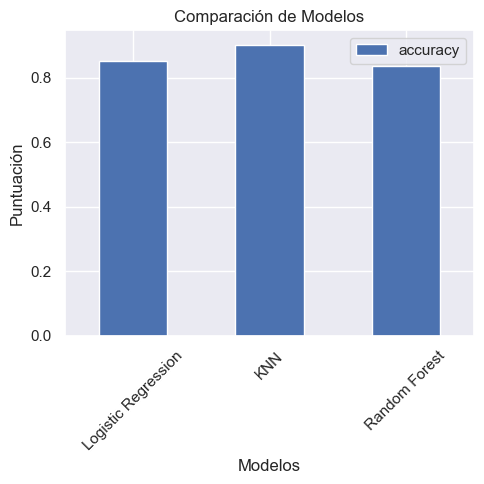

In [10]:
# comparación de modelos
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot(kind="bar", figsize=(5,5))
plt.title("Comparación de Modelos")
plt.xlabel("Modelos")
plt.ylabel("Puntuación")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

Los resultados muestran que:

- Logistic Regression y KNN obtienen una precisión de 0.8033 (80.33%).
- **Random Forest** tiene el mejor rendimiento inicial con una precisión de **0.8361 (83.61%)**.

Siguientes pasos:
- Evaluar los modelos usando **métricas** más completas:
    - Matriz de confusión
    - Precision
    - Recall
    - F1-Score
    - Classification report
    - ROC-AUC
- Realizar **validación cruzada** para comprobar si los resultados son consistentes.
- **Ajustar hiperparámetros** para mejorar el rendimiento de los modelos (*hyperparameters tuning*).
- Importancia de **características** (*feature importance*)
- Usar visualizaciones para comparar y analizar los modelos.

#### Ajuste de hiperparámetros (a mano)

In [11]:
# Ajustar KNN
train_scores = []
test_scores = []

# Crear una lista de diferentes valores para n_neighbors
neighbors = range(1, 21)

# Configurar la instancia de KNN
knn = KNeighborsClassifier()

# Iterar a través de diferentes n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Ajustar el algoritmo
    knn.fit(X_train, y_train)
    
    # Actualizar la lista de scores de entrenamiento
    train_scores.append(knn.score(X_train, y_train))
    
    # Actualizar la lista de scores de prueba
    test_scores.append(knn.score(X_test, y_test))

Puntuación máxima de KNN en los datos de prueba: 75.41%


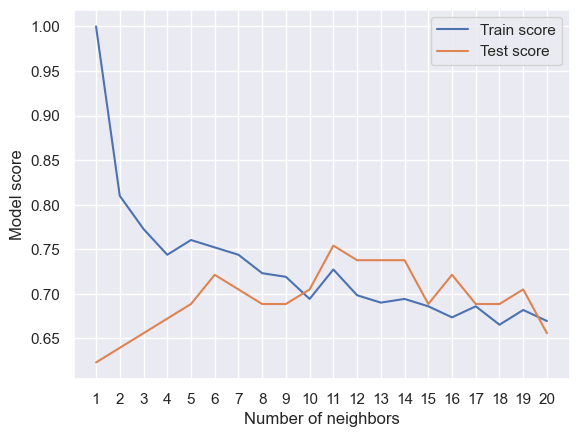

In [12]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Puntuación máxima de KNN en los datos de prueba: {max(test_scores)*100:.2f}%")

In [13]:
# Ajustar KNN usando datos escalados
train_scores = []
test_scores = []

# Crear una lista de diferentes valores para n_neighbors
neighbors = range(1, 21)

# Configurar la instancia de KNN
knn = KNeighborsClassifier()

# Iterar a través de diferentes n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Ajustar el algoritmo
    knn.fit(X_train_scaled, y_train)
    
    # Actualizar la lista de scores de entrenamiento
    train_scores.append(knn.score(X_train_scaled, y_train))
    
    # Actualizar la lista de scores de prueba
    test_scores.append(knn.score(X_test_scaled, y_test))

Puntuación máxima de KNN en los datos de prueba: 91.80%


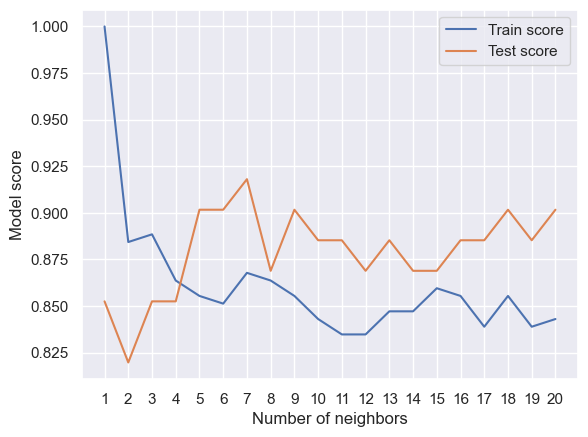

In [14]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Puntuación máxima de KNN en los datos de prueba: {max(test_scores)*100:.2f}%")

#### Ajustar hiperparámetros con RandomizedSearchCV

Vamos a ajustar:

- `LogisticRegression()`
- `RandomForestClassifier()`

... usando RandomizedSearchCV

In [15]:
# Crear una cuadrícula de hiperparámetros para LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Crear una cuadrícula de hiperparámetros para RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [16]:
# Ajustar LogisticRegression
np.random.seed(42)

# Configuración de búsqueda aleatoria de hiperparámetros para LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Ajustar el modelo de búsqueda aleatoria de hiperparámetros para LogisticRegression
rs_log_reg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [17]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [18]:
log_reg_score = rs_log_reg.score(X_test_scaled, y_test)
log_reg_score

0.8524590163934426

In [19]:
# Ajustar RandomForestClassifier
np.random.seed(42)

# Configuración de búsqueda aleatoria de hiperparámetros para RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Ajustar el modelo de búsqueda aleatoria de hiperparámetros para RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [20]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [21]:
rf_score = rs_rf.score(X_test, y_test)
rf_score

0.8688524590163934

#### Ajustar hiperparámetros con GridSearchCV

Vamos a ajustar:

- `LogisticRegression()`
- `KNN`

... usando GridSearchCV

In [22]:
# Crear una cuadrícula de hiperparámetros para LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "penalty": ["l1", "l2"],
                "solver": ["liblinear"]}

# GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Ajustar el modelo
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [23]:
# Comprobar mejores hiperparámetros
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [24]:
# Evaluar el modelo
log_reg_score = gs_log_reg.score(X_test, y_test)
log_reg_score

0.8852459016393442

In [25]:
# Explorar diferentes valores de n_neighbors usando GridSearchCV
param_grid = {"n_neighbors": np.arange(1, 21, 1)}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gs_knn.fit(X_train_scaled, y_train)
print(gs_knn.best_params_)

{'n_neighbors': 16}


In [26]:
knn_score = gs_knn.score(X_test_scaled, y_test)
knn_score

0.8852459016393442

#### Validación cruzada

In [27]:
models = {
    "Random Forest": rs_rf.best_estimator_,
    "Logistic Regression": gs_log_reg.best_estimator_,
    "KNN": gs_knn.best_estimator_
}

scaled_models = ["KNN"]  # Modelos que necesitan datos escalados

In [28]:
# Evaluar métricas para los modelos
metrics_results = evaluate_cross_validation_metrics(
    models=models,
    X_train=X_train,
    y_train=y_train,
    cv=5,
    metrics=["accuracy", "precision", "recall", "f1"],
    scaled_models=scaled_models,
    X_train_scaled=X_train_scaled
)

Random Forest - Accuracy: 0.82 (+/- 0.01)
Random Forest - Precision: 0.80 (+/- 0.02)
Random Forest - Recall: 0.88 (+/- 0.04)
Random Forest - F1: 0.83 (+/- 0.02)
Logistic Regression - Accuracy: 0.83 (+/- 0.02)
Logistic Regression - Precision: 0.82 (+/- 0.02)
Logistic Regression - Recall: 0.89 (+/- 0.04)
Logistic Regression - F1: 0.86 (+/- 0.02)
KNN - Accuracy: 0.83 (+/- 0.02)
KNN - Precision: 0.81 (+/- 0.02)
KNN - Recall: 0.91 (+/- 0.03)
KNN - F1: 0.85 (+/- 0.02)


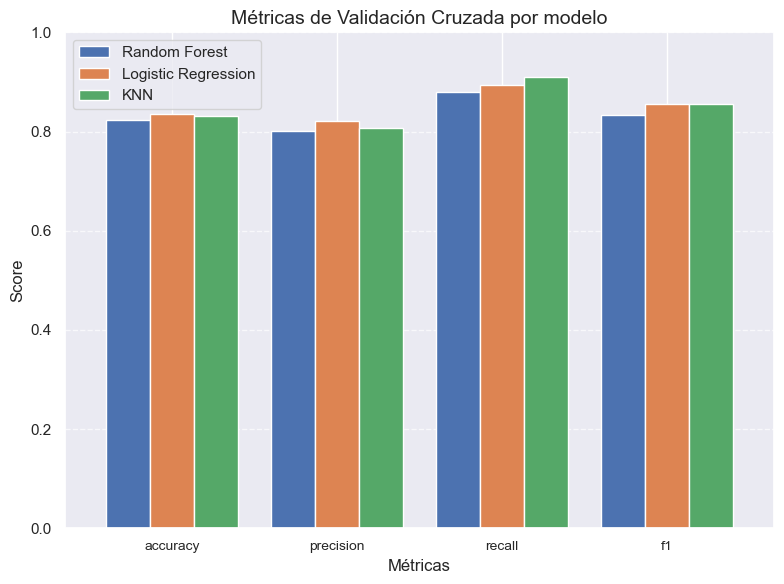

In [29]:
# Graficar métricas
plot_cross_validation_metrics(metrics_results)

### Matriz de confusión

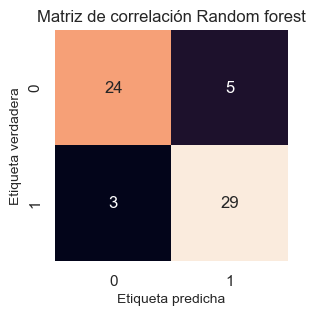

In [30]:
# Hacer predicciones de Random Forest con GridSearchCV
y_preds = rs_rf.predict(X_test)

# Matriz de confusión
plot_conf_mat(y_test, y_preds, model='Random forest', path_plot='../assets/modeling/confusion_matrix_rf.png')

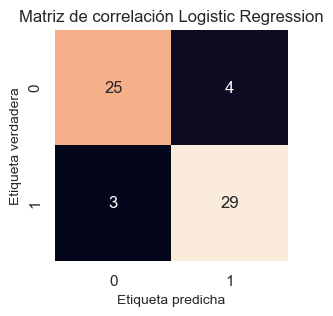

In [31]:
# Hacer predicciones de Logistic Regression con GridSearchCV
y_preds = gs_log_reg.predict(X_test)

# Matriz de confusión
plot_conf_mat(y_test, y_preds, model='Logistic Regression', path_plot='../assets/modeling/confusion_matrix_log_reg.png')

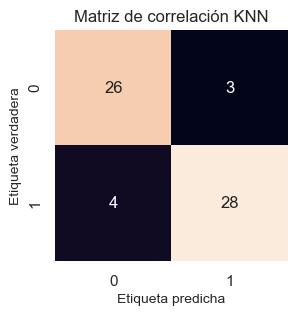

In [32]:
# Hacer predicciones de KNeighbors Classifier
y_preds = gs_knn.predict(X_test_scaled)

# Matriz de confusión
plot_conf_mat(y_test, y_preds, model='KNN', path_plot='../assets/modeling/confusion_matrix_knn.png')

#### Importancia de características

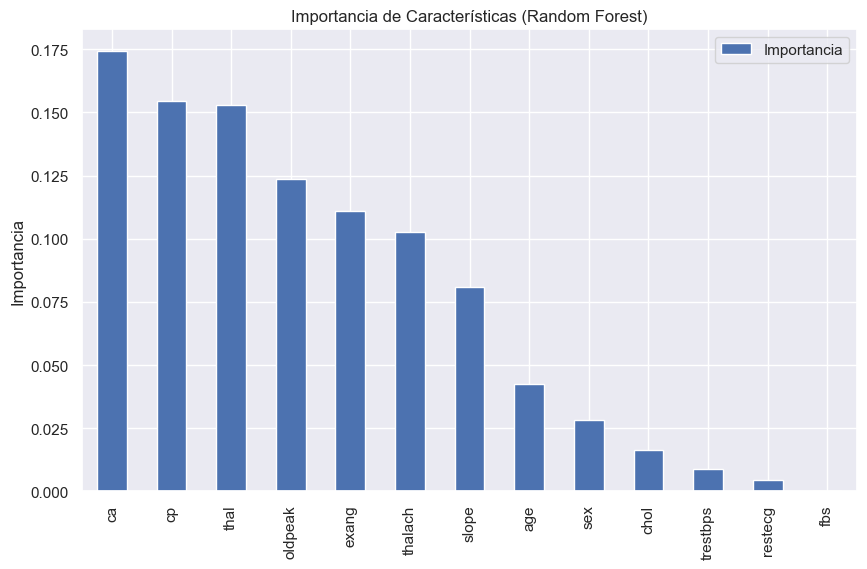

In [33]:
# Importancia de características en Random Forest
importances = rs_rf.best_estimator_.feature_importances_
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=["Importancia"]).sort_values(by="Importancia", ascending=False)

feature_importances.plot(kind="bar", figsize=(10, 6))
plt.title("Importancia de Características (Random Forest)")
plt.ylabel("Importancia")

# Guardar el gráfico
plt.savefig('../assets/modeling/feature_importance_rf.png')

# Mostrar el gráfico
plt.show()

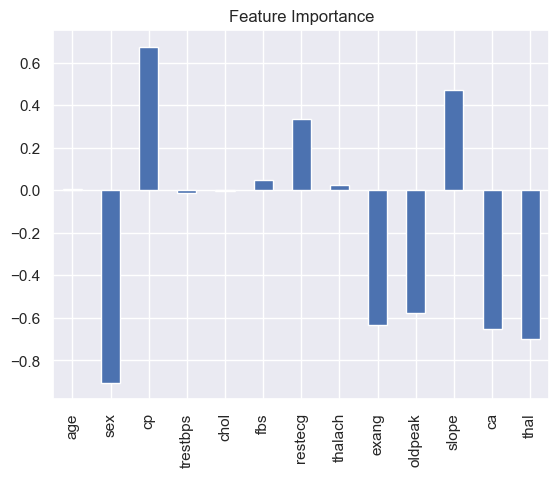

In [34]:
# Ajustar una instancia de LogisticRegression
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

clf.fit(X_train, y_train)
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

# Visualizar la importancia de características
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

# Guardar el gráfico
plt.savefig('../assets/modeling/feature_importance_logreg.png');

#### Curva ROC para cada modelo

In [35]:
evaluate_model(gs_log_reg, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

ROC-AUC: 0.92


In [36]:
evaluate_model(gs_knn, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

ROC-AUC: 0.91


In [37]:
evaluate_model(rs_rf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC-AUC: 0.93


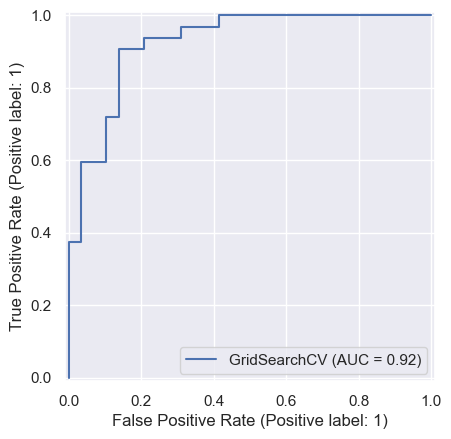

In [38]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

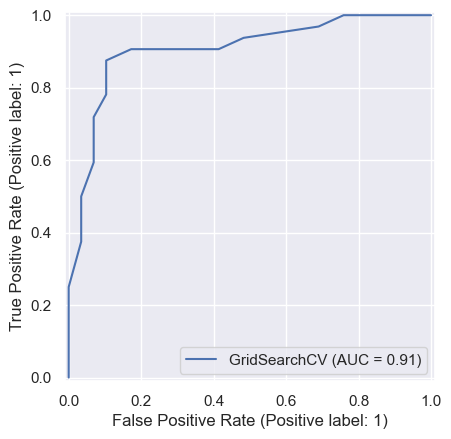

In [39]:
RocCurveDisplay.from_estimator(gs_knn, X_test_scaled, y_test);

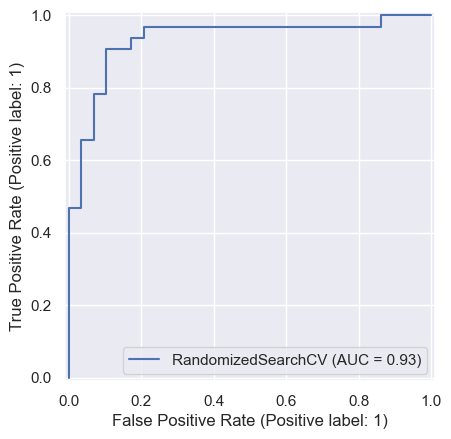

In [40]:
RocCurveDisplay.from_estimator(rs_rf, X_test, y_test);

#### Probar combinación de modelos

In [41]:
from sklearn.ensemble import VotingClassifier

# Crear un clasificador de votación
voting_clf = VotingClassifier(
    estimators=[
        ("lr", rs_log_reg.best_estimator_),
        ("rf", rs_rf.best_estimator_)
    ],
    voting="soft"
)

voting_clf.fit(X_train_scaled, y_train)
print(f"Precisión del clasificador de votación: {voting_clf.score(X_test_scaled, y_test):.2f}")

Precisión del clasificador de votación: 0.89


La puntuación de 0.80 con ensamblaje sugiere que el modelo combinado no mejora significativamente sobre los modelos individuales. Esto puede deberse a que los modelos ya están cerca de su límite de rendimiento.

In [42]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ("lr", rs_log_reg.best_estimator_),
    ("rf", rs_rf.best_estimator_)
]
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf.fit(X_train_scaled, y_train)
print(f"Stacking score: {stack_clf.score(X_test_scaled, y_test):.2f}")

Stacking score: 0.89


### Guardar modelos

In [43]:
# Guardar los modelos
joblib.dump(rs_rf.best_estimator_, "../models/random_forest_model.pkl")
joblib.dump(gs_log_reg.best_estimator_, "../models/logistic_regression_model.pkl")
joblib.dump(gs_knn.best_estimator_, "../models/knn_model.pkl")

['../models/knn_model.pkl']